- 采用数据集:wine reviews
- 缺失值处理方法:舍弃缺失值

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

### 数据总览
- country:这个葡萄酒来自哪个国家
- description:对于这个葡萄酒的描述
- designation:酒厂中的葡萄园
- points:对葡萄酒的评分
- price:酒的价格
- province:葡萄酒产于哪个的省/州
- region_1:生产葡萄酒的省/州
- taster_name:品酒师的名字
- taster_twitter_handle:品酒师的twitter
- region_2:生产葡萄酒更加特定的区域
- title 评论文章的标题
- variety:酿造葡萄酒的葡萄种类
- winery:酿酒厂

In [10]:
winemag_data_130k_v2 = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv",index_col=0)
winemag_data_130k_v2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


- 由于数据集中description一项属性在每一栏都不一样,因此对此属性进行舍弃

In [11]:
winemag_data_130k_v2 = winemag_data_130k_v2.drop(columns=['description'],axis=1)
winemag_data_130k_v2 = winemag_data_130k_v2.dropna()
winemag_data_130k_v2

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...
129919,US,Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
129926,US,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,US,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,US,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


- 创建进行关联挖掘的属性列表

In [12]:
attr_list = ['country', 'designation', 'points', 'price','province', 'region_1', 'region_2','taster_name','taster_twitter_handle', 'title','variety', 'winery']

- 对于points, price这种数值属性，做离散化处理。认为大于均值的为1， 小于等于均值的为0

In [15]:
data1 = winemag_data_130k_v2
points_mean = data1['points'].mean()
price_mean = data1['price'].mean()
points_index_1, points_index_0 = data1['points'] > points_mean, data1['points'] <= points_mean
price_index_1, price_index_0 = data1['price'] > price_mean, data1['price'] <= price_mean

data1.loc[points_index_1, 'points'], data1.loc[points_index_0, 'points']= 1, 0
data1.loc[price_index_1, 'price'], data1.loc[price_index_0, 'price']= 1, 0

data1['points'] = data1['points'].astype(str)
data1['price'] = data1['price'].astype(str)
data1 = data1[attr_list]
print(data1)

       country                         designation points price    province  \
4           US  Vintner's Reserve Wild Child Block      1   1.0      Oregon   
10          US                      Mountain Cuvée      1   0.0  California   
23          US                 Signature Selection      1   0.0  California   
25          US                 King Ridge Vineyard      1   1.0  California   
35          US                              Hyland      1   1.0      Oregon   
...        ...                                 ...    ...   ...         ...   
129919      US                             Reserve      0   1.0  Washington   
129926      US                 Ash Hollow Vineyard      0   0.0  Washington   
129945      US    Jurassic Park Vineyard Old Vines      0   0.0  California   
129949      US                    Barrel Fermented      0   0.0  California   
129950      US                       Blocks 7 & 22      0   0.0  California   

                       region_1           region_2 

In [19]:
from efficient_apriori import apriori
transactions = [ tuple(x) for x in data1.values.tolist()]

- 设定最小支持度为0.2，最小置信度为0.6的关联挖掘

In [22]:
min_support = 0.2
min_confidence = 0.6
items, rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)
#查看频繁项集
items

{1: {('US',): 22387,
  ('@paulgwine\xa0',): 5989,
  ('1',): 10313,
  ('1.0',): 8959,
  ('Pinot Noir',): 4807,
  ('Paul Gregutt',): 5989,
  ('California',): 12900,
  ('0.0',): 13428,
  ('Virginie Boone',): 6422,
  ('@vboone',): 6422,
  ('Central Coast',): 4689,
  ('@mattkettmann',): 4479,
  ('Matt Kettmann',): 4479,
  ('Columbia Valley',): 5532,
  ('Washington',): 5845,
  ('0',): 12075},
 2: {('1', 'US'): 10313,
  ('1.0', 'US'): 8959,
  ('@paulgwine\xa0', 'Paul Gregutt'): 5989,
  ('@paulgwine\xa0', 'US'): 5989,
  ('Paul Gregutt', 'US'): 5989,
  ('Pinot Noir', 'US'): 4807,
  ('0.0', '1'): 8255,
  ('0.0', 'California'): 7032,
  ('0.0', 'US'): 13428,
  ('1', 'California'): 5335,
  ('@vboone', 'California'): 6422,
  ('@vboone', 'US'): 6422,
  ('@vboone', 'Virginie Boone'): 6422,
  ('California', 'US'): 12900,
  ('California', 'Virginie Boone'): 6422,
  ('US', 'Virginie Boone'): 6422,
  ('@mattkettmann', 'California'): 4479,
  ('@mattkettmann', 'Matt Kettmann'): 4479,
  ('@mattkettmann', 'US

In [23]:
#查看关联规则
for rule in sorted(rules, key = lambda rule: rule.lift):
    print(rule)

{1} -> {US} (conf: 1.000, supp: 0.461, lift: 1.000, conv: 0.000)
{1.0} -> {US} (conf: 1.000, supp: 0.400, lift: 1.000, conv: 0.000)
{@paulgwine } -> {US} (conf: 1.000, supp: 0.268, lift: 1.000, conv: 0.000)
{Paul Gregutt} -> {US} (conf: 1.000, supp: 0.268, lift: 1.000, conv: 0.000)
{Pinot Noir} -> {US} (conf: 1.000, supp: 0.215, lift: 1.000, conv: 0.000)
{0.0} -> {US} (conf: 1.000, supp: 0.600, lift: 1.000, conv: 0.000)
{@vboone} -> {US} (conf: 1.000, supp: 0.287, lift: 1.000, conv: 0.000)
{California} -> {US} (conf: 1.000, supp: 0.576, lift: 1.000, conv: 0.000)
{Virginie Boone} -> {US} (conf: 1.000, supp: 0.287, lift: 1.000, conv: 0.000)
{@mattkettmann} -> {US} (conf: 1.000, supp: 0.200, lift: 1.000, conv: 0.000)
{Central Coast} -> {US} (conf: 1.000, supp: 0.209, lift: 1.000, conv: 0.000)
{Matt Kettmann} -> {US} (conf: 1.000, supp: 0.200, lift: 1.000, conv: 0.000)
{Columbia Valley} -> {US} (conf: 1.000, supp: 0.247, lift: 1.000, conv: 0.000)
{Washington} -> {US} (conf: 1.000, supp: 0.

### 结论
    1. 加利福尼亚州产出的酒在美国占了大多数
    2. 品酒师给出的评价越高,对应的酒价格就越贵

## 数据可视化

### 置信度-支持度关于提升度的散点图绘制

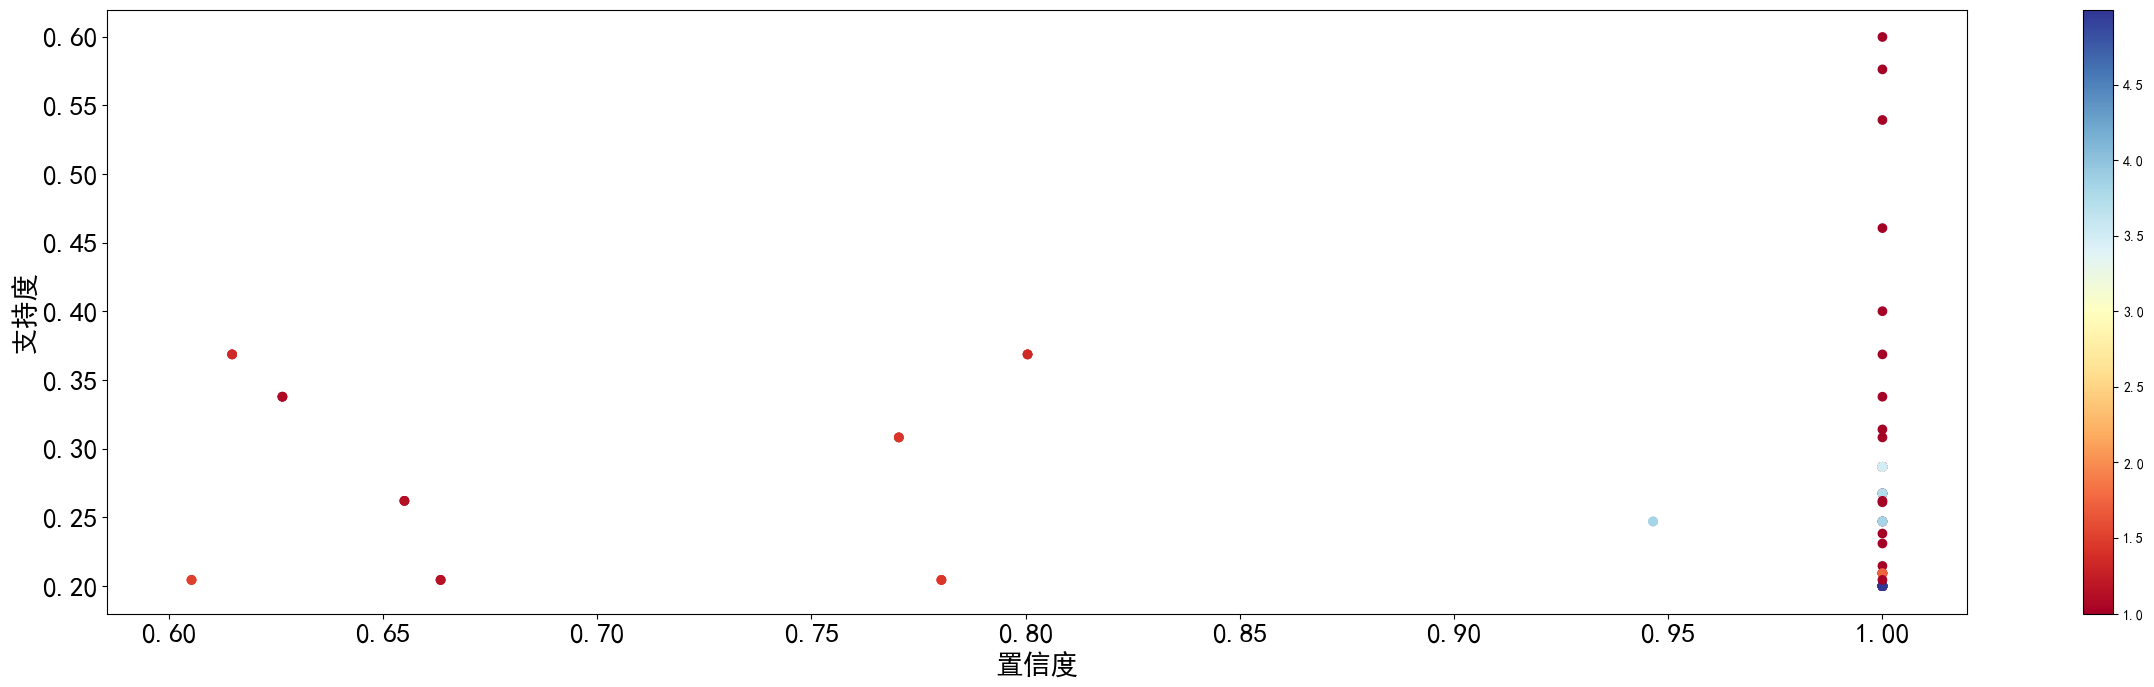

In [32]:
#解决中文乱码问题!
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
confidence = [rule.confidence for rule in rules]
support = [rule.support for rule in rules]
deep = [rule.lift for rule in rules]


plt.figure(figsize=(30,8),dpi=100)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(confidence, support, c=deep, cmap=cm)
plt.xlabel('置信度',fontsize=20)
plt.ylabel('支持度',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar=plt.colorbar(sc)
plt.show()

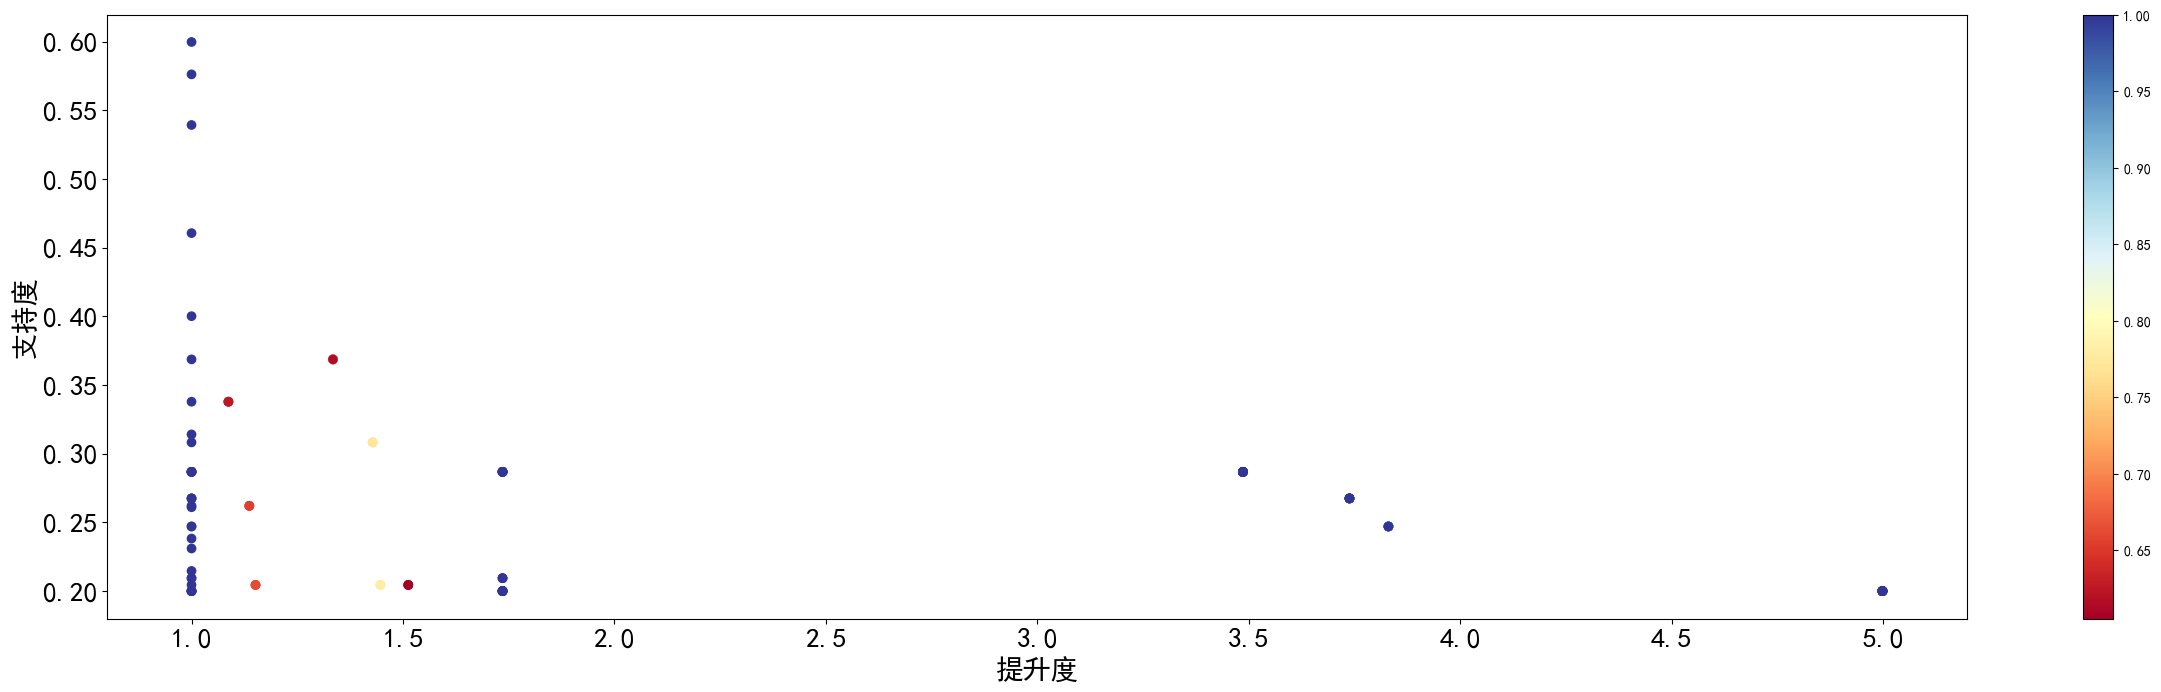

In [33]:
deep = [rule.confidence for rule in rules]
support = [rule.support for rule in rules]
lift = [rule.lift for rule in rules]


plt.figure(figsize=(30,8),dpi=100)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(lift, support, c=deep, cmap=cm)
plt.xlabel('提升度',fontsize=20)
plt.ylabel('支持度',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar=plt.colorbar(sc)
plt.show()

### 读取winemag_data_first150k表中的数据

In [56]:
winemag_data_first150k = pd.read_csv("wine-reviews/winemag-data_first150k.csv",index_col=0)
winemag_data_first150k = winemag_data_first150k.drop(columns=['description'],axis=1)
winemag_data_first150k = winemag_data_first150k.dropna()
winemag_data_first150k


,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...
150889,US,Lafond Vineyard,82,35.0,California,Santa Ynez Valley,Central Coast,Pinot Noir,Lafond
150892,US,Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150914,US,Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


### 数据总览
- country:这个葡萄酒来自哪个国家
- description:对于这个葡萄酒的描述
- designation:酒厂中的葡萄园
- points:对葡萄酒的评分
- price:酒的价格
- province:葡萄酒产于哪个的省/州
- region_1:生产葡萄酒的省/州
- region_2:生产葡萄酒更加特定的区域
- variety:酿造葡萄酒的葡萄种类
- winery:酿酒厂

In [57]:
attr_list1 = ['country', 'designation', 'points', 'price','province', 'region_1', 'region_2','variety', 'winery']

In [58]:
data2 = winemag_data_first150k
points_mean = data2['points'].mean()
price_mean = data2['price'].mean()
points_index_1, points_index_0 = data2['points'] > points_mean, data2['points'] <= points_mean
price_index_1, price_index_0 = data2['price'] > price_mean, data2['price'] <= price_mean

data2.loc[points_index_1, 'points'], data2.loc[points_index_0, 'points']= 1, 0
data2.loc[price_index_1, 'price'], data2.loc[price_index_0, 'price']= 1, 0

data2['points'] = data2['points'].astype(str)
data2['price'] = data2['price'].astype(str)
data2 = data2[attr_list1]
print(data2)

       country                    designation points price    province  \
0           US              Martha's Vineyard      1   1.0  California   
2           US  Special Selected Late Harvest      1   1.0  California   
3           US                        Reserve      1   1.0      Oregon   
8           US                         Silice      1   1.0      Oregon   
9           US           Gap's Crown Vineyard      1   1.0  California   
...        ...                            ...    ...   ...         ...   
150889      US                Lafond Vineyard      0   0.0  California   
150892      US                        Coastal      0   0.0  California   
150914      US    Late Harvest Cluster Select      1   0.0  California   
150915      US                    Nightingale      1   0.0  California   
150916      US                      J. Schram      1   1.0  California   

                  region_1                 region_2             variety  \
0              Napa Valley          

In [59]:
transactions = [tuple(x) for x in data2.values.tolist()]

In [60]:
min_support = 0.2
min_confidence = 0.6
items, rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)
#查看频繁项集
items

{1: {('California',): 28557,
  ('US',): 39241,
  ('1',): 18434,
  ('1.0',): 15767,
  ('0.0',): 23474,
  ('Central Coast',): 9150,
  ('0',): 20807},
 2: {('1', '1.0'): 11003,
  ('1', 'California'): 12955,
  ('1', 'US'): 18434,
  ('1.0', 'California'): 12449,
  ('1.0', 'US'): 15767,
  ('California', 'US'): 28557,
  ('0.0', 'California'): 16108,
  ('0.0', 'US'): 23474,
  ('California', 'Central Coast'): 9150,
  ('Central Coast', 'US'): 9150,
  ('0', '0.0'): 16043,
  ('0', 'California'): 15602,
  ('0', 'US'): 20807},
 3: {('1', '1.0', 'California'): 8367,
  ('1', '1.0', 'US'): 11003,
  ('1', 'California', 'US'): 12955,
  ('1.0', 'California', 'US'): 12449,
  ('0.0', 'California', 'US'): 16108,
  ('California', 'Central Coast', 'US'): 9150,
  ('0', '0.0', 'California'): 11520,
  ('0', '0.0', 'US'): 16043,
  ('0', 'California', 'US'): 15602},
 4: {('1', '1.0', 'California', 'US'): 8367,
  ('0', '0.0', 'California', 'US'): 11520}}

In [61]:
#查看关联规则
for rule in sorted(rules, key = lambda rule: rule.lift):
    print(rule)

{0.0} -> {California} (conf: 0.686, supp: 0.410, lift: 0.943, conv: 0.868)
{0.0, US} -> {California} (conf: 0.686, supp: 0.410, lift: 0.943, conv: 0.868)
{0.0} -> {California, US} (conf: 0.686, supp: 0.410, lift: 0.943, conv: 0.868)
{1} -> {California} (conf: 0.703, supp: 0.330, lift: 0.966, conv: 0.916)
{1, US} -> {California} (conf: 0.703, supp: 0.330, lift: 0.966, conv: 0.916)
{1} -> {California, US} (conf: 0.703, supp: 0.330, lift: 0.966, conv: 0.916)
{0, 0.0} -> {California} (conf: 0.718, supp: 0.294, lift: 0.987, conv: 0.966)
{0, 0.0, US} -> {California} (conf: 0.718, supp: 0.294, lift: 0.987, conv: 0.966)
{0, 0.0} -> {California, US} (conf: 0.718, supp: 0.294, lift: 0.987, conv: 0.966)
{1} -> {US} (conf: 1.000, supp: 0.470, lift: 1.000, conv: 0.000)
{1.0} -> {US} (conf: 1.000, supp: 0.402, lift: 1.000, conv: 0.000)
{US} -> {California} (conf: 0.728, supp: 0.728, lift: 1.000, conv: 1.000)
{California} -> {US} (conf: 1.000, supp: 0.728, lift: 1.000, conv: 0.000)
{0.0} -> {US} (con

### 结论
    1. 加利福尼亚州产出的酒在美国占了大多数
    2. 品酒师给出的评价越高,对应的酒价格就越贵

## 数据可视化

### 置信度-支持度关于提升度的散点图绘制

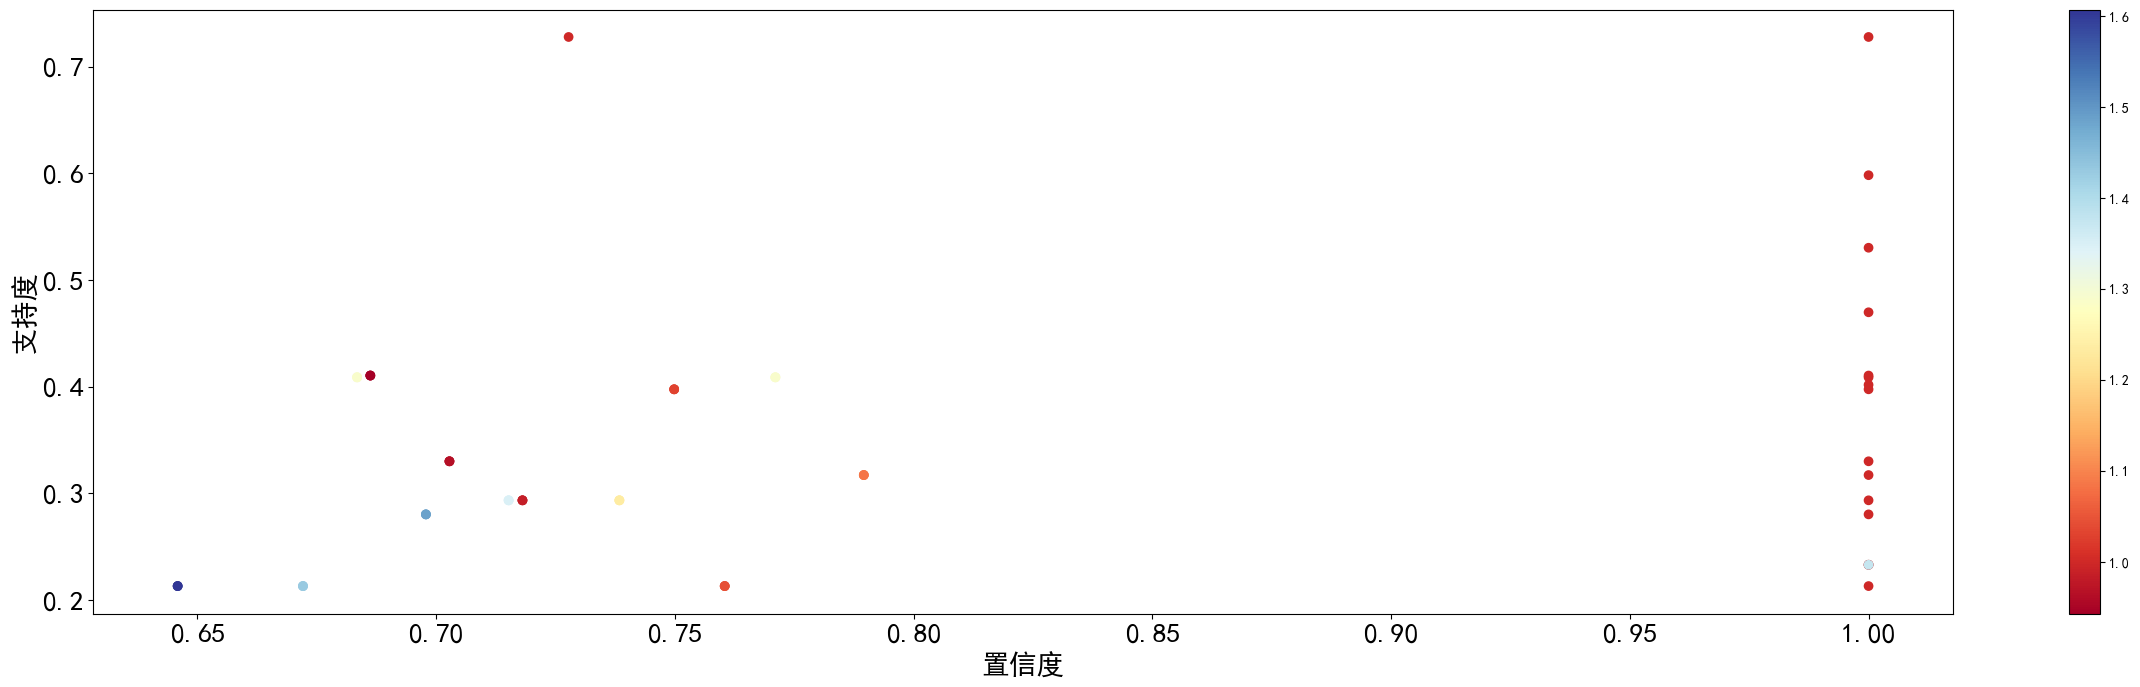

In [62]:
#解决中文乱码问题!
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
confidence = [rule.confidence for rule in rules]
support = [rule.support for rule in rules]
deep = [rule.lift for rule in rules]


plt.figure(figsize=(30,8),dpi=100)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(confidence, support, c=deep, cmap=cm)
plt.xlabel('置信度',fontsize=20)
plt.ylabel('支持度',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar=plt.colorbar(sc)
plt.show()

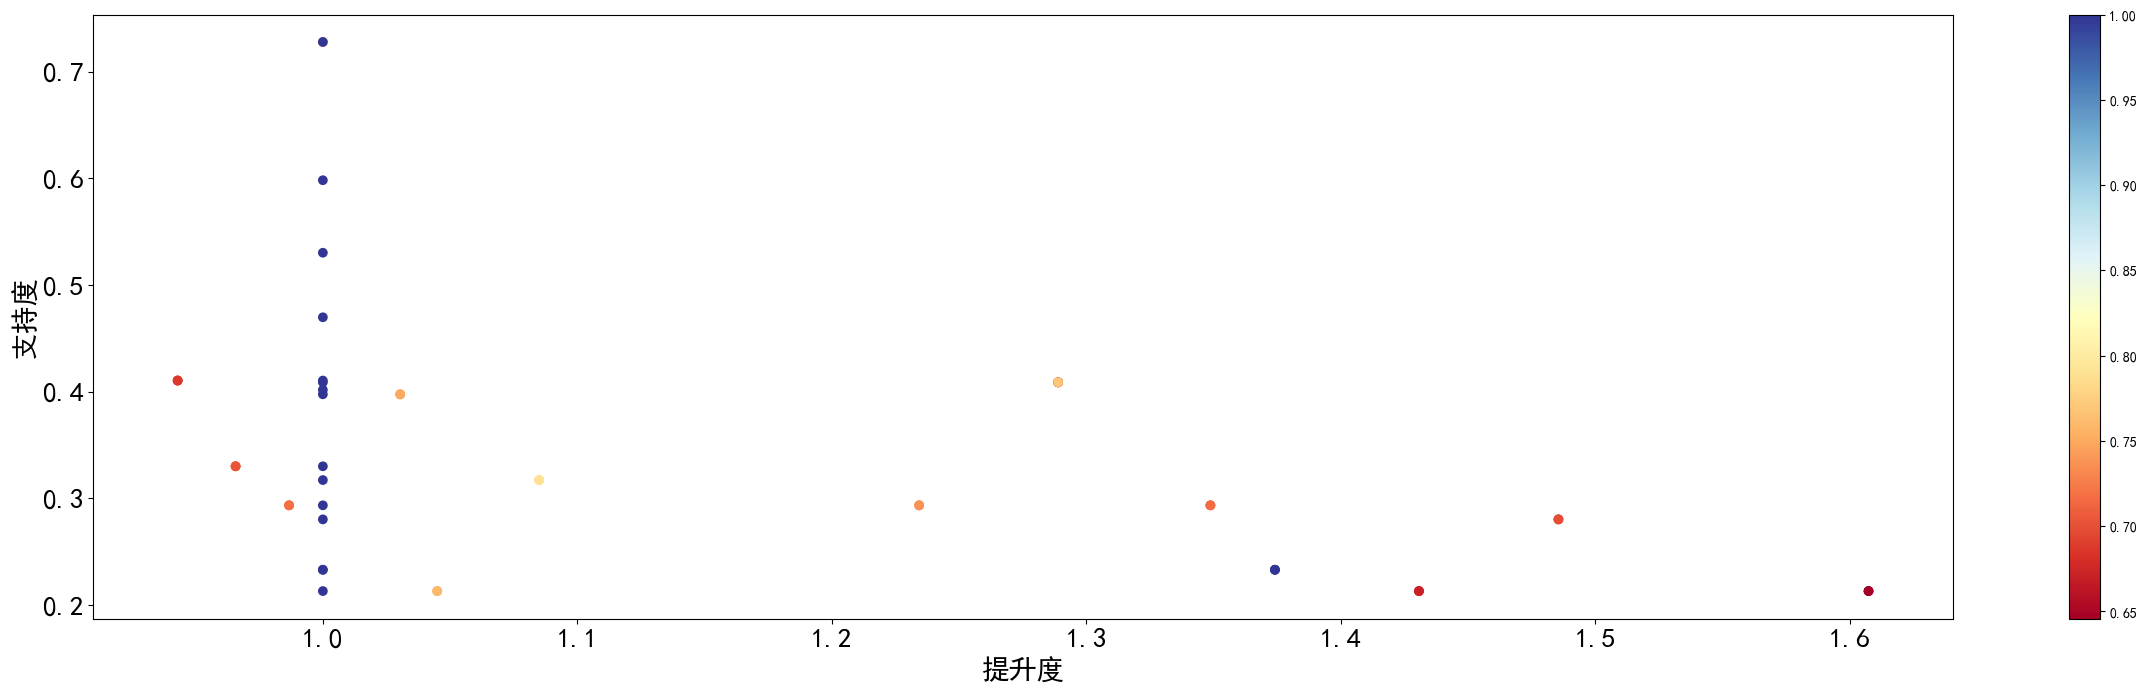

In [63]:
deep = [rule.confidence for rule in rules]
support = [rule.support for rule in rules]
lift = [rule.lift for rule in rules]


plt.figure(figsize=(30,8),dpi=100)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(lift, support, c=deep, cmap=cm)
plt.xlabel('提升度',fontsize=20)
plt.ylabel('支持度',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar=plt.colorbar(sc)
plt.show()